# Setup and Load Data

In [94]:
# ====================================================
# Setup & Imports
# ====================================================


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from tabulate import tabulate

# settings for plot
sns.set_theme(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (12,8)
warnings.filterwarnings('ignore')

# Reproducibility

SEED = 42
TARGET = 'loan_paid_back'

In [95]:
# --- 1. Load Dataset ---
print(" Loading Dataset ... ")
df_train = pd.read_csv('/Users/victorhugo/Documents/Work/Kaggle/Loan Payback/playground-series-s5e11/train.csv')
df_test = pd.read_csv('/Users/victorhugo/Documents/Work/Kaggle/Loan Payback/playground-series-s5e11/test.csv')

# --- 2. Shape of each dataset ---

print('\n --- Dataset Shapes ---')
print(f'df_train: {df_train.shape}')
print(f'df_test:  {df_test.shape}')

 Loading Dataset ... 

 --- Dataset Shapes ---
df_train: (593994, 13)
df_test:  (254569, 12)


# 2. Exploratory Data Analysis (EDA)

## 2.1 Data info

In [96]:
df_train.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [97]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [98]:
df_train.isna().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [99]:
summary = pd.DataFrame({
    'Datatype':df_train.dtypes,
    "Non-null count": df_train.notnull().sum(),
    'Unique Values': df_train.nunique(),
    'Missing Values': df_train.isna().sum(),
    'Missing %' : (df_train.isna().sum()/ len(df_train))*100
})

summary

,Datatype,Non-null count,Unique Values,Missing Values,Missing %
id,int64,593994,593994,0,0.0
annual_income,float64,593994,119728,0,0.0
debt_to_income_ratio,float64,593994,526,0,0.0
credit_score,int64,593994,399,0,0.0
loan_amount,float64,593994,111570,0,0.0
interest_rate,float64,593994,1454,0,0.0
gender,object,593994,3,0,0.0
marital_status,object,593994,4,0,0.0
education_level,object,593994,5,0,0.0
employment_status,object,593994,5,0,0.0


In [100]:
# Numeric Features
df_train.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442235,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [101]:
# Categorical summary

categories = ['gender','marital_status','education_level','loan_purpose','grade_subgrade']
train_cat = df_train[categories].describe().transpose()
train_cat

,count,unique,top,freq
gender,593994,3,Female,306175
marital_status,593994,4,Single,288843
education_level,593994,5,Bachelor's,279606
loan_purpose,593994,8,Debt consolidation,324695
grade_subgrade,593994,30,C3,58695


In [102]:
# Target Distribution

target_dist = df_train['loan_paid_back'].value_counts(normalize=True)
print("--- Target Distribution ---")
print(target_dist)

# 20 % of people do not payback the loans

--- Target Distribution ---
loan_paid_back
1.0    0.79882
0.0    0.20118
Name: proportion, dtype: float64


## 2.2. Feature Selection

In [103]:
# Summary of categories and excluded categories

delete_cat = ['id', 'loan_paid_back']

print('\n --- Feature Classification on df_train ---')

# Numerical and categorical features, excluding the categories

num_features = [
    col for col in df_train.select_dtypes(include = np.number).columns
    if col not in delete_cat
]

cat_features = [
    col for col in df_train.select_dtypes(exclude = np.number).columns
    if col not in delete_cat
]

print("Numerical Features: ")
print(f' List: {num_features}')
print(f" Size: {len(num_features)}\n")

print("Categorical Features")
print(f' List: {cat_features}')
print(f' Size: {len(cat_features)}\n')


 --- Feature Classification on df_train ---
Numerical Features: 
 List: ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate']
 Size: 5

Categorical Features
 List: ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']
 Size: 6



## 2.3 Correlation Numeric Heatmap

[]

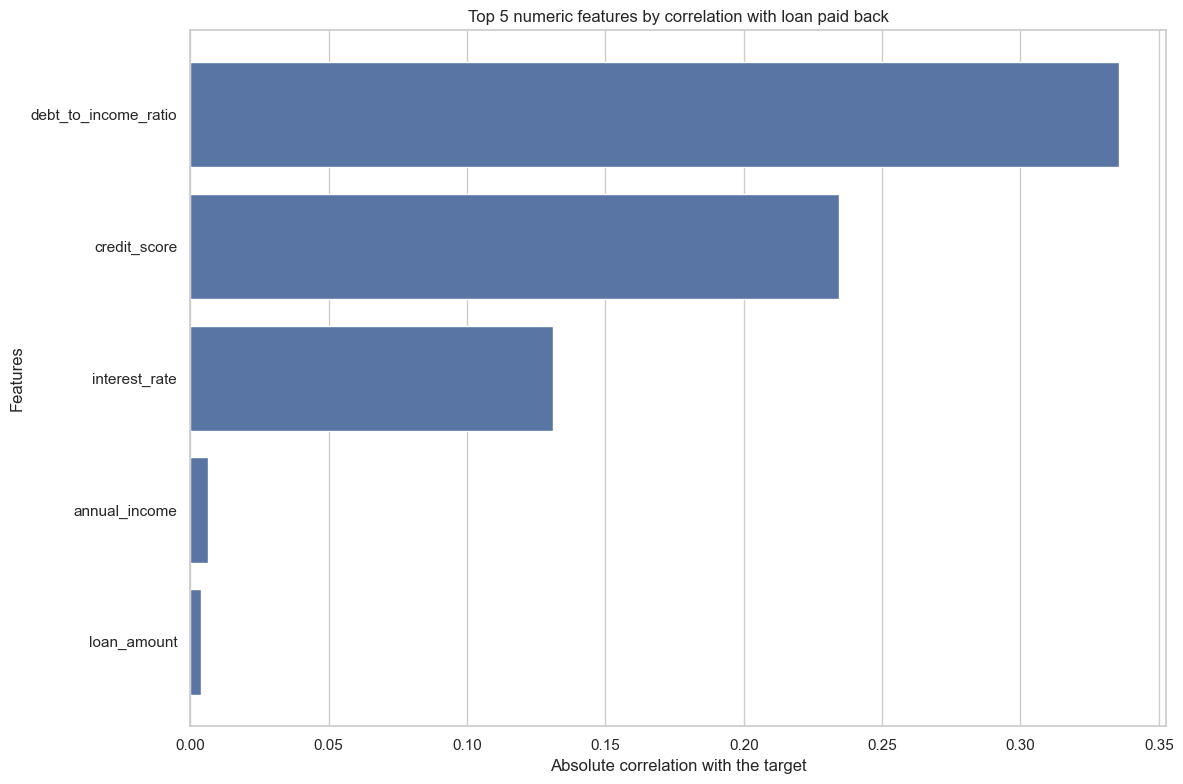

In [104]:
# numeric correlations
correlations = df_train[num_features + ['loan_paid_back']].corr()['loan_paid_back'].abs().sort_values(ascending=False)

plt.figure(figsize = (12,8))
top_corr = correlations.head(5)

sns.barplot(x=correlations[1:].values, y=correlations.index[1:])
plt.title("Top 5 numeric features by correlation with loan paid back")
plt.ylabel("Features")
plt.xlabel("Absolute correlation with the target")
plt.tight_layout()
plt.plot()

[]

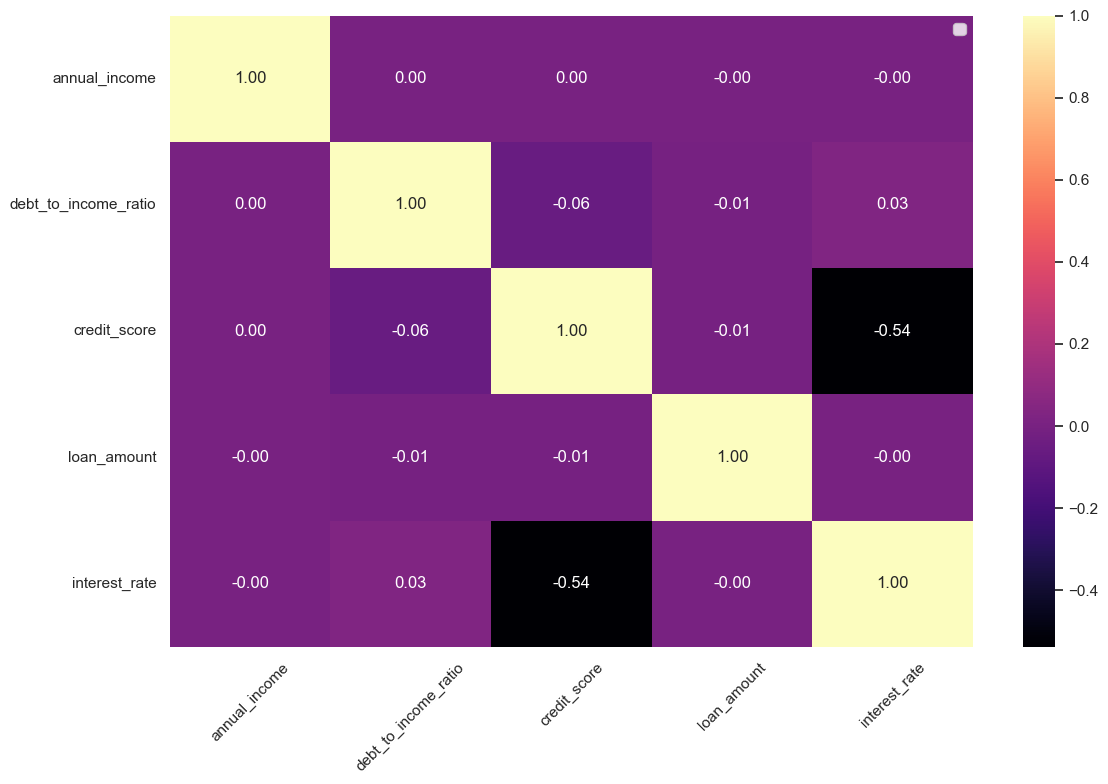

In [105]:
# correlation matrix
corr = df_train[num_features].corr()

# Heatmap

plt.figure(figsize=(12,8))

sns.heatmap(corr, annot = True ,fmt = '.2f',cmap = 'magma')
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.plot()

# Detect colinearity

### From this we would probably eliminate annual_income and loan_amout , since these informations should already be given by debt_to_income_ratio

## 2.3 Numeric Distributions



- This step is essential to compare the distribution and detect outliers in numeric features between the training and test datasets.
- By visualizing distributions (using KDE and boxplots), we confirm if train and test data follow similar patterns, which is crucial for reliable model performance.
- Identifying discrepancies or outliers early allows us to plan appropriate replacements, transformations, or feature engineering before training.
- Proper preprocessing helps avoid model biases, improves generalization, and increases prediction robustness in production.

**Understanding numeric feature behavior and differences between train/test is a foundational step to ensure the quality and effectiveness of the machine learning pipeline.**


Statistics for the feature annual_income 

+--------+----------+----------+----------+---------------+
| Source |   mean   |  median  |   std    |    feature    |
+--------+----------+----------+----------+---------------+
|  Test  | 48233.08 | 46528.98 | 26719.66 | annual_income |
| Train  | 48212.20 | 46557.68 | 26711.94 | annual_income |
+--------+----------+----------+----------+---------------+


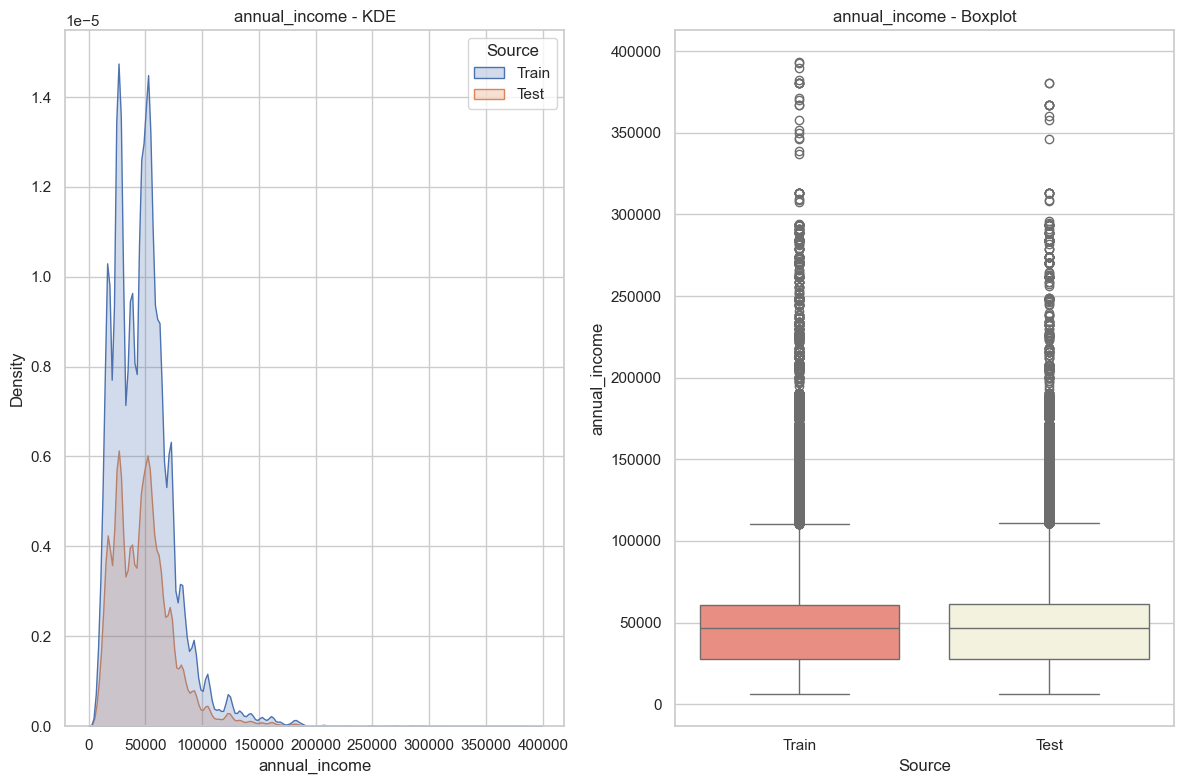

Statistics for the feature debt_to_income_ratio 

+--------+------+--------+------+----------------------+
| Source | mean | median | std  |       feature        |
+--------+------+--------+------+----------------------+
|  Test  | 0.12 |  0.10  | 0.07 | debt_to_income_ratio |
| Train  | 0.12 |  0.10  | 0.07 | debt_to_income_ratio |
+--------+------+--------+------+----------------------+


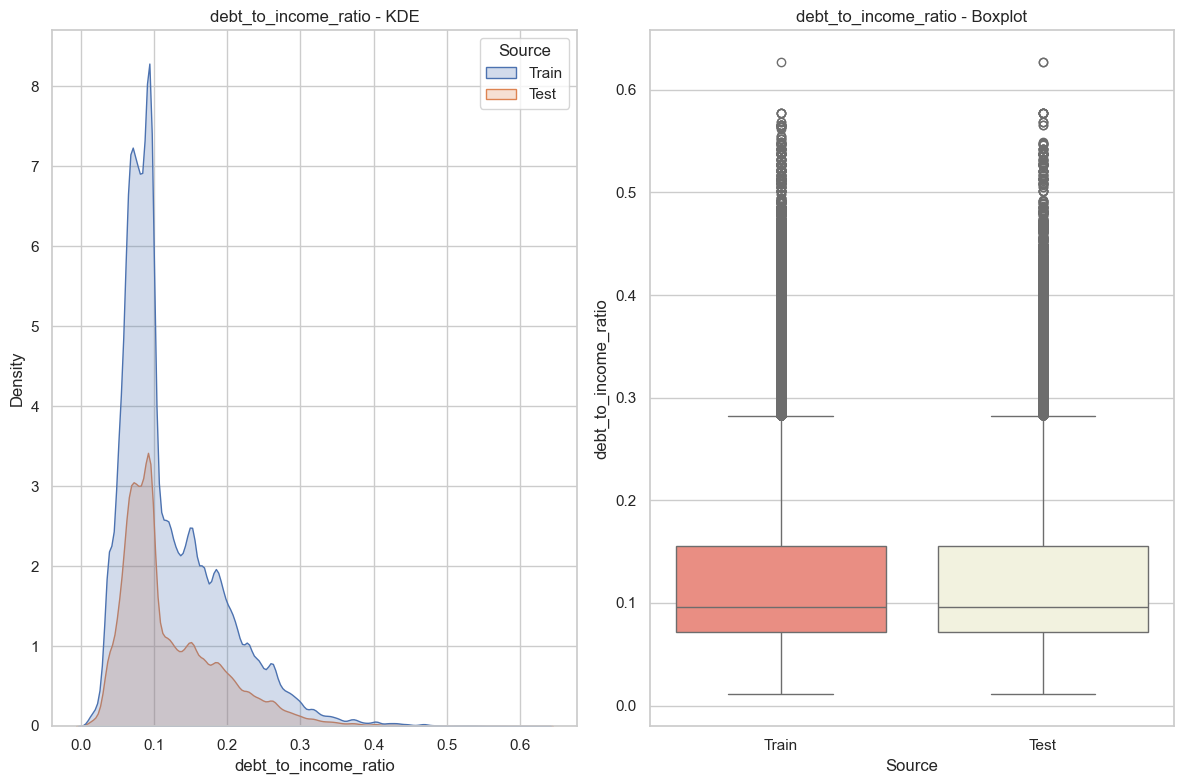

Statistics for the feature credit_score 

+--------+--------+--------+-------+--------------+
| Source |  mean  | median |  std  |   feature    |
+--------+--------+--------+-------+--------------+
|  Test  | 681.04 | 683.00 | 55.62 | credit_score |
| Train  | 680.92 | 682.00 | 55.42 | credit_score |
+--------+--------+--------+-------+--------------+


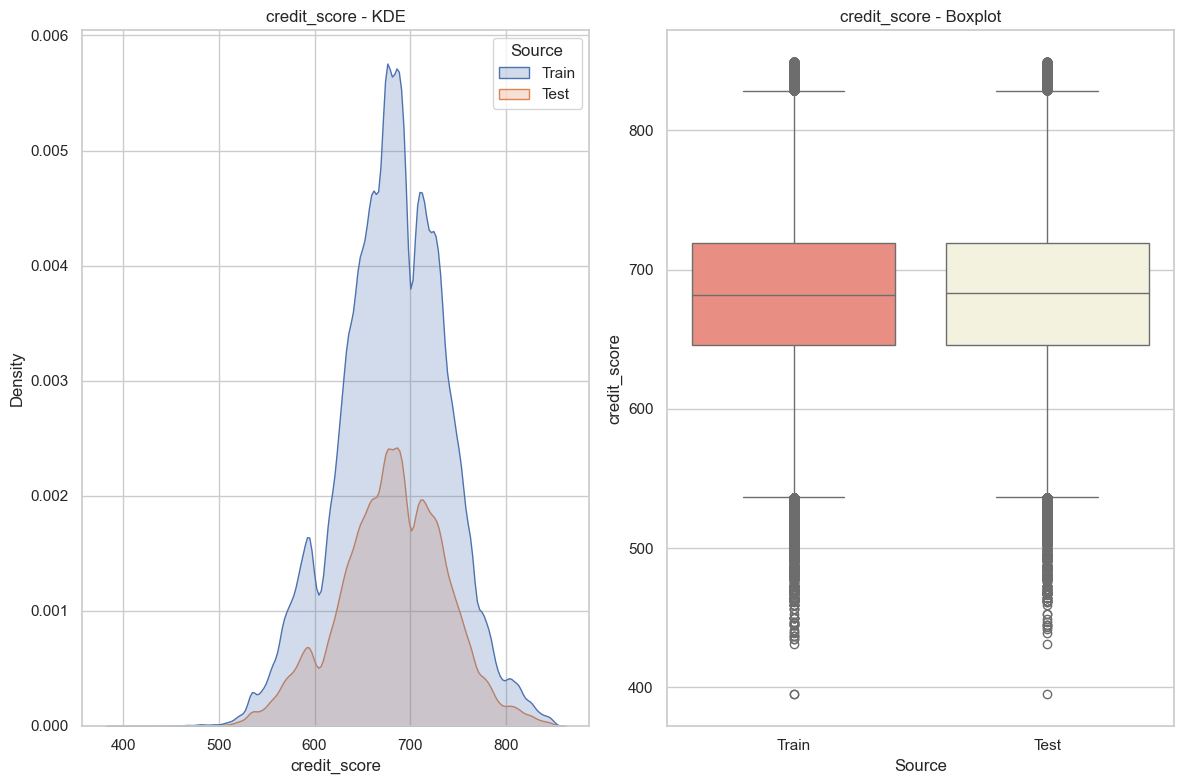

Statistics for the feature loan_amount 

+--------+----------+----------+---------+-------------+
| Source |   mean   |  median  |   std   |   feature   |
+--------+----------+----------+---------+-------------+
|  Test  | 15016.75 | 15000.22 | 6922.17 | loan_amount |
| Train  | 15020.30 | 15000.22 | 6926.53 | loan_amount |
+--------+----------+----------+---------+-------------+


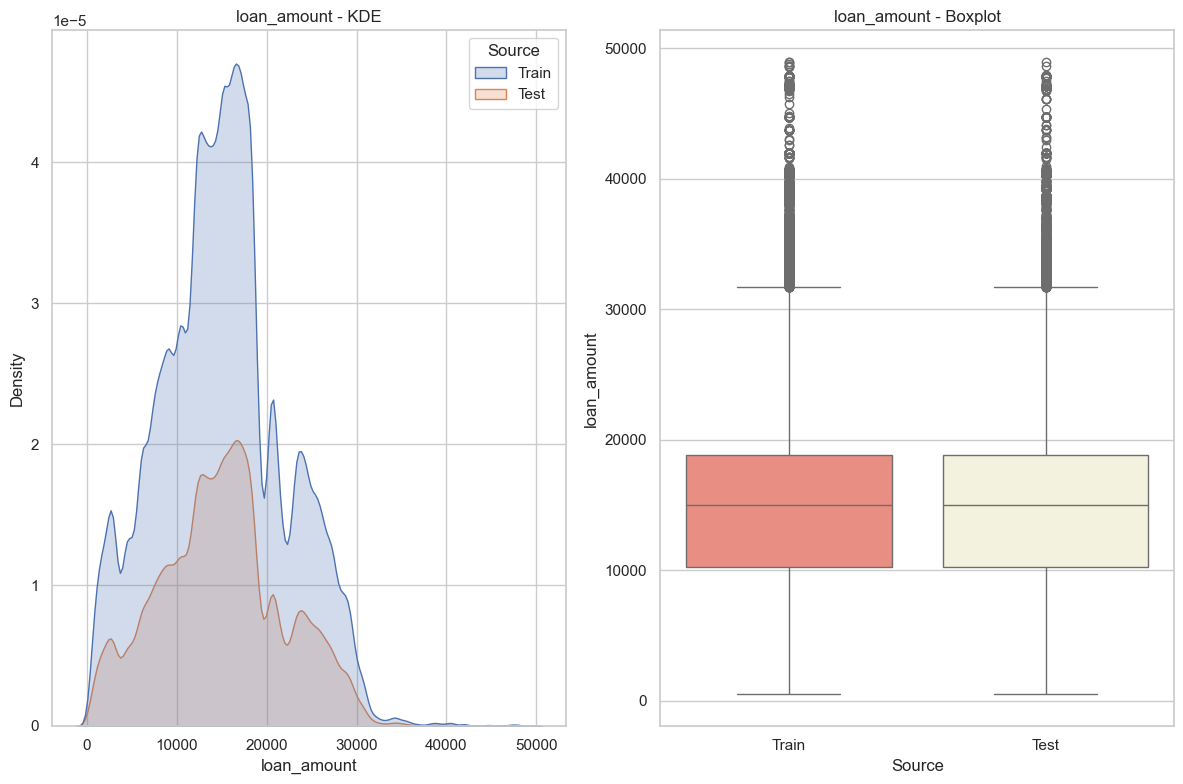

Statistics for the feature interest_rate 

+--------+-------+--------+------+---------------+
| Source | mean  | median | std  |    feature    |
+--------+-------+--------+------+---------------+
|  Test  | 12.35 | 12.37  | 2.02 | interest_rate |
| Train  | 12.36 | 12.37  | 2.01 | interest_rate |
+--------+-------+--------+------+---------------+


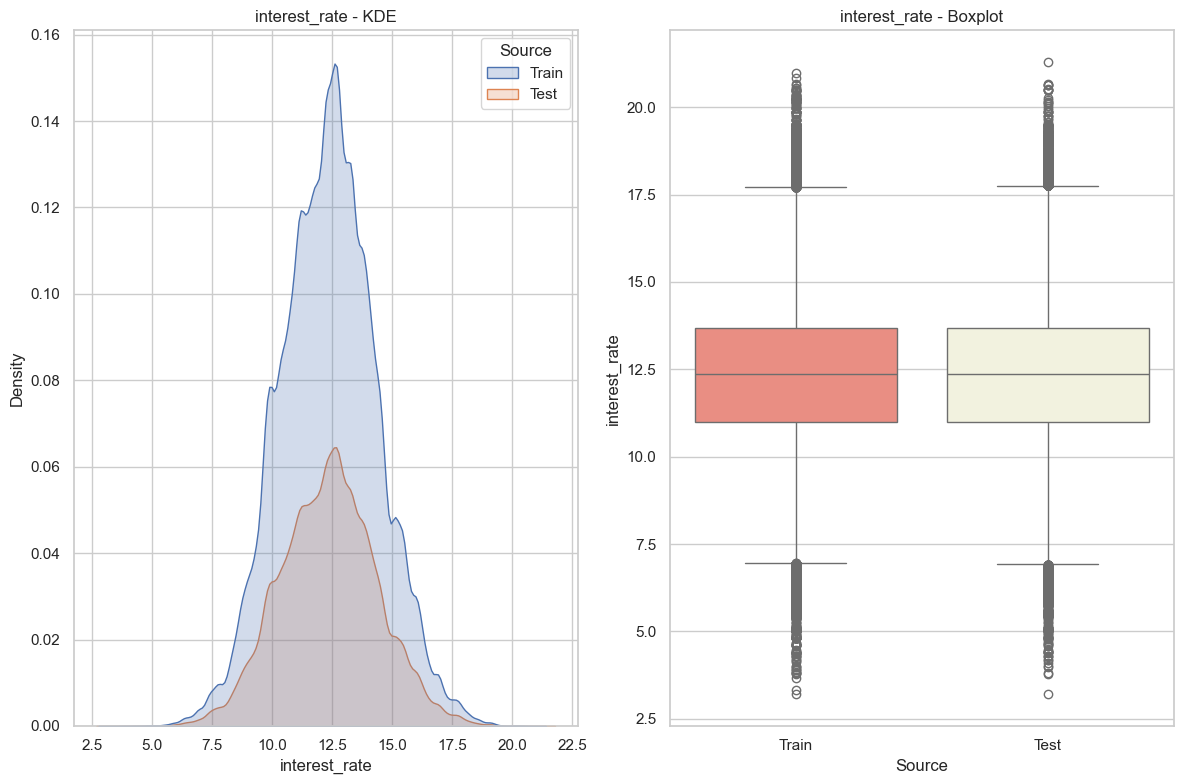

In [106]:
# All numeric relations
# Since i want to see the distribution and how spread it is , i want the mean, std and median for every feature
# if i just try to put on the same graph, maybe the ax will not be aligned.
# In order to use Hue of seaborn ,it is better to concatenate 


# Create a new column called source on the df and feel the value of test 
# Since i will create a new column , i will copy the data

view_train_number = df_train[num_features].copy()
view_train_number['Source']= 'Train'

view_test_number = df_test[num_features].copy()
view_test_number['Source'] = 'Test'

view_concat_number = pd.concat([view_train_number,view_test_number], ignore_index= True)

stats = []

for col in num_features:
    # Mean , median , std
    
    stats_col = view_concat_number.groupby('Source')[col].agg(['mean','median','std']).reset_index()
    # Select the group and then the COLUMN
    stats_col['feature'] = col
    stats.append(stats_col)
    
    # Format
    
    stats_col[['mean','median','std']] = stats_col[['mean','median','std']].applymap(lambda x: f'{x:.2f}')
    
    print(f'Statistics for the feature {col} \n')
    print(tabulate(stats_col,headers ='keys' , tablefmt ='pretty', showindex = False))
    
    
    # Figure
    fig = plt.figure(figsize=(12,8))
    
    # axis 
    ax1 = fig.add_subplot(1,2,1)  # KDE
    ax2 = fig.add_subplot(1,2,2)  # Boxplot
    
    # Plot KDE and Boxplot
    
    sns.kdeplot(data=view_concat_number, x=col , ax = ax1 , hue = 'Source', fill= True)
    ax1.set_title(f'{col} - KDE')
    
    sns.boxplot(data=view_concat_number, x="Source", y=col, ax = ax2, palette=['salmon','beige'])
    ax2.set_title(f'{col} - Boxplot')
    
    plt.tight_layout()
    plt.show()

# 2.3 Categorical Features

In [107]:
print(cat_features)

['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']


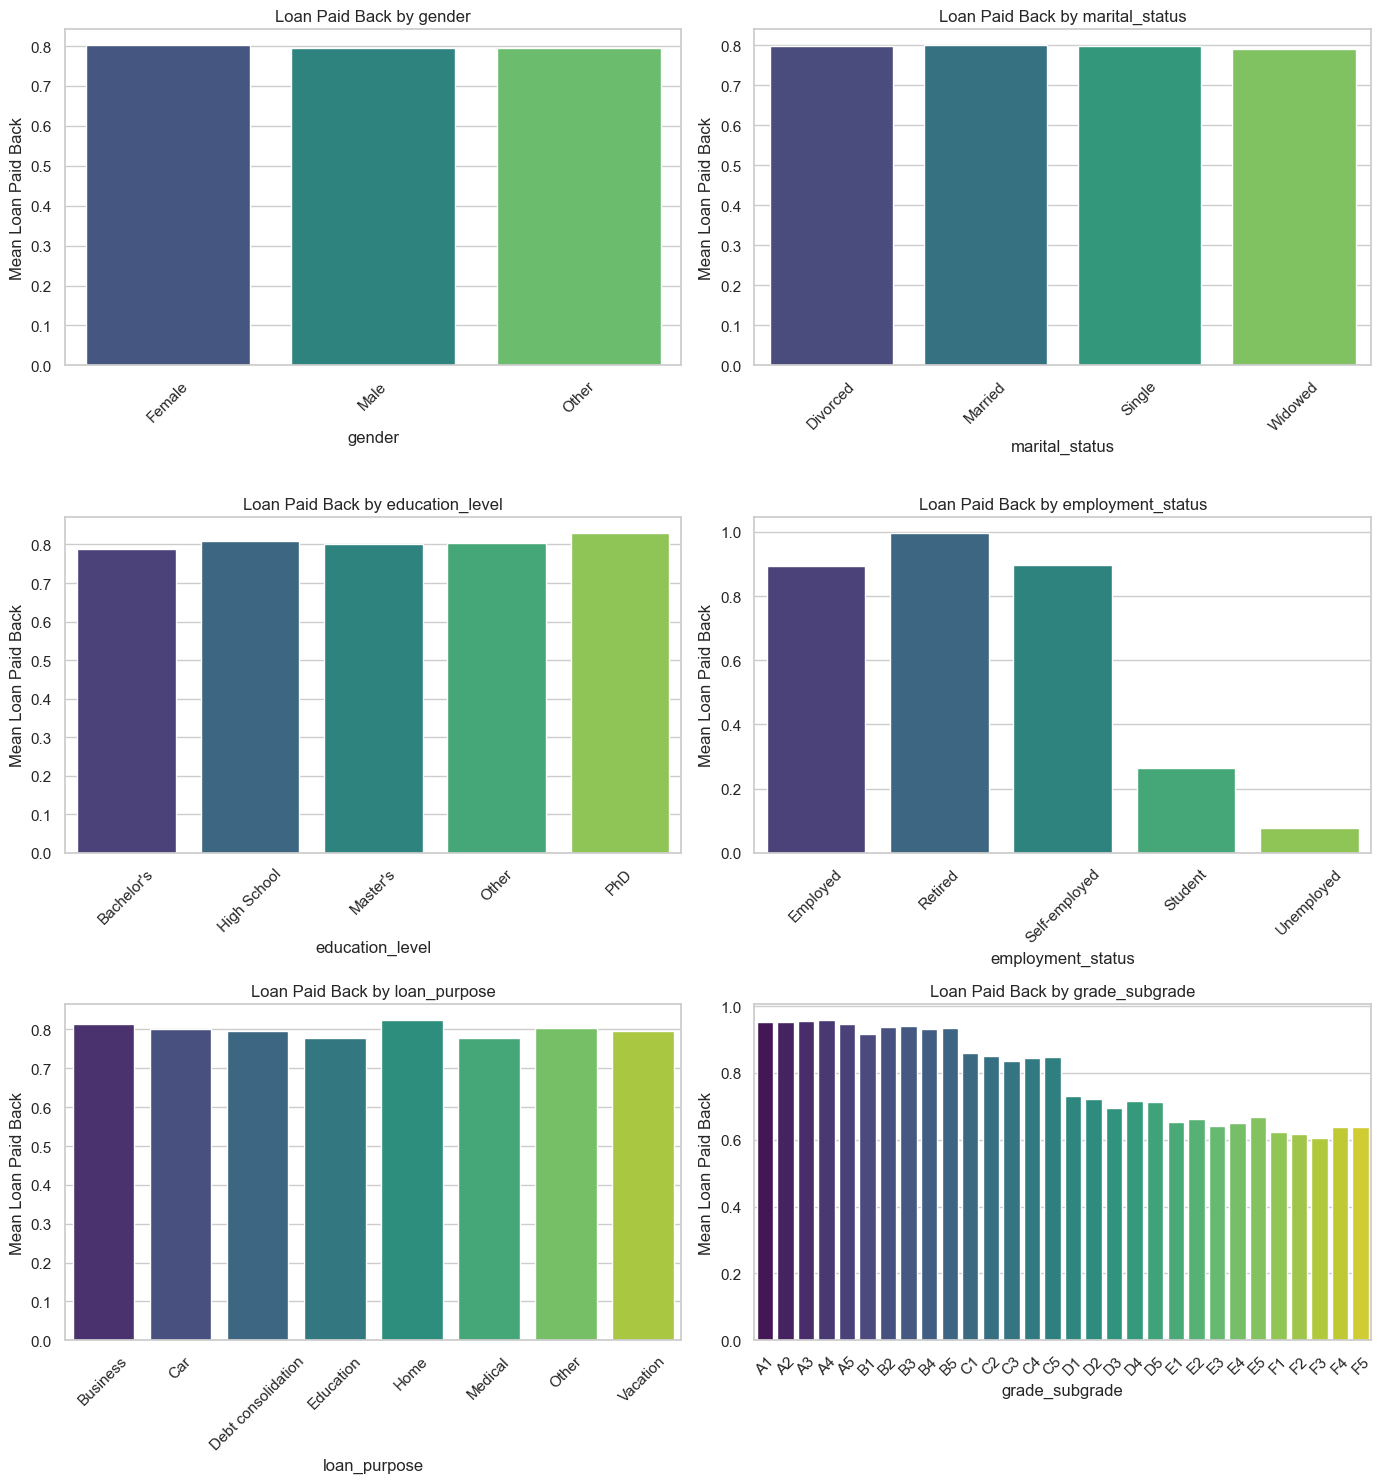

In [108]:
# Relations of categories with LOAN PAID BACK


n_cols = 2
n_rows = (len(cat_features) + n_cols -1) // n_cols


fig,axes = plt.subplots(n_rows,n_cols,figsize = (n_cols*7, n_rows*5))
axes = axes.flatten()

for i,col in enumerate(cat_features):
    # Group for every category and calculate the mean of loan_paid_back
    data_plot = df_train.groupby(col)['loan_paid_back'].mean().reset_index()    
    
    sns.barplot(data = data_plot, x = col, y = 'loan_paid_back', palette = 'viridis',ax = axes[i])
    axes[i].set_title(f"Loan Paid Back by {col}")
    axes[i].set_ylabel('Mean Loan Paid Back')
    axes[i].set_xlabel(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)


# Delete the remaining axes
for j in range (i+1,len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

# Chi-Square Test

In [109]:
label_encoder = LabelEncoder()

for cat in cat_features:
    df_train[cat] = label_encoder.fit_transform(df_train[cat])
X_cat = df_train[categories]
y = df_train['loan_paid_back']      # Goal

chi2_stats , p_values = chi2(X_cat,y)

print(f'{"Feature":<20} {"Chi2 Stat":>10} {"P-value":>10}')
print('-'*60)
for col, chi2_stat , p_val in zip(X_cat.columns, chi2_stats, p_values):
    print(f'{col:<20}: chi2={chi2_stat:10.2f}, p-value={p_val:10.4f}')
    

Feature               Chi2 Stat    P-value
------------------------------------------------------------
gender              : chi2=     17.19, p-value=    0.0000
marital_status      : chi2=      0.02, p-value=    0.8804
education_level     : chi2=    238.29, p-value=    0.0000
loan_purpose        : chi2=      0.59, p-value=    0.4418
grade_subgrade      : chi2=  50193.64, p-value=    0.0000


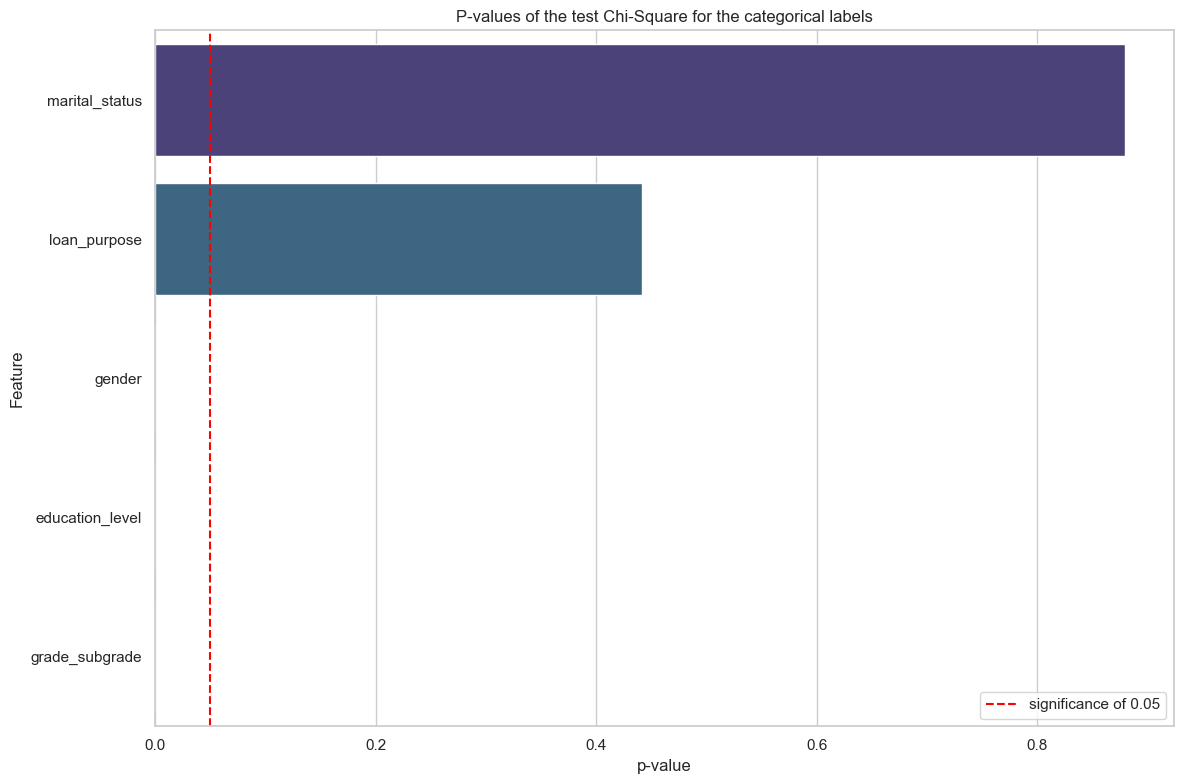

In [110]:
p_values_df = pd.DataFrame({
    'Feature' : X_cat.columns,
    'p-value' : p_values
}).sort_values('p-value',ascending = False)

plt.figure(figsize=(12,8))

sns.barplot(data = p_values_df, x = 'p-value' , y='Feature', palette = 'viridis')
plt.axvline(x=0.05, color = 'red', linestyle = '--' , label = 'significance of 0.05')
plt.title("P-values of the test Chi-Square for the categorical labels")
plt.legend()
plt.tight_layout()
plt.show()

In [111]:
# Analysing the categories 

view_train_cat = df_train[cat_features].copy()
view_train_cat["Source"] = 'Train'

view_test_cat = df_test[cat_features].copy()
view_test_cat['Source'] = 'Test'

# concatenate
#  Ignore index in order to ignore DUPLICATES
view_concat_cat = pd.concat([view_train_cat,view_test_cat], ignore_index = False)


In [112]:
view_concat_cat

,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,Source
0,0,2,1,2,6,12,Train
1,1,1,2,0,2,17,Train
2,1,2,1,0,2,14,Train
3,0,2,1,0,2,25,Train
4,1,1,1,0,6,15,Train
...,...,...,...,...,...,...,...
254564,Female,Single,Bachelor's,Employed,Debt consolidation,B2,Test
254565,Female,Married,High School,Employed,Debt consolidation,D4,Test
254566,Male,Single,Master's,Employed,Debt consolidation,C4,Test
254567,Male,Single,Bachelor's,Employed,Business,C2,Test


## From this ,we could discard 'loan_purpose' and 'marital_status'